## Logistic Regression

In [354]:
# from google.colab import drive
# drive.mount('/content/drive')

In [355]:
#!pip install numpy
# !pip install --upgrade numpy==1.24.3
# !pip show numpy

In [356]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

<a id = '1'></a><br>
# Load And Read Data

In [357]:
data = pd.read_csv("../230808/diabetes_data.csv")

In [358]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [359]:
y = data.Outcome.values
x_data = data.drop(["Outcome"],axis=1)

In [360]:
x_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


<a id = '2'></a><br>
# Normalization of x_data Feature's

In [361]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
# 0과 1사이 범위로 처리

/opt/homebrew/Caskroom/miniconda/base/envs/yeardream/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/yeardream/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/yeardream/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'


In [362]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


<a id = '3'></a><br>
# Train-Test Split

In [363]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.48, random_state = 42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T


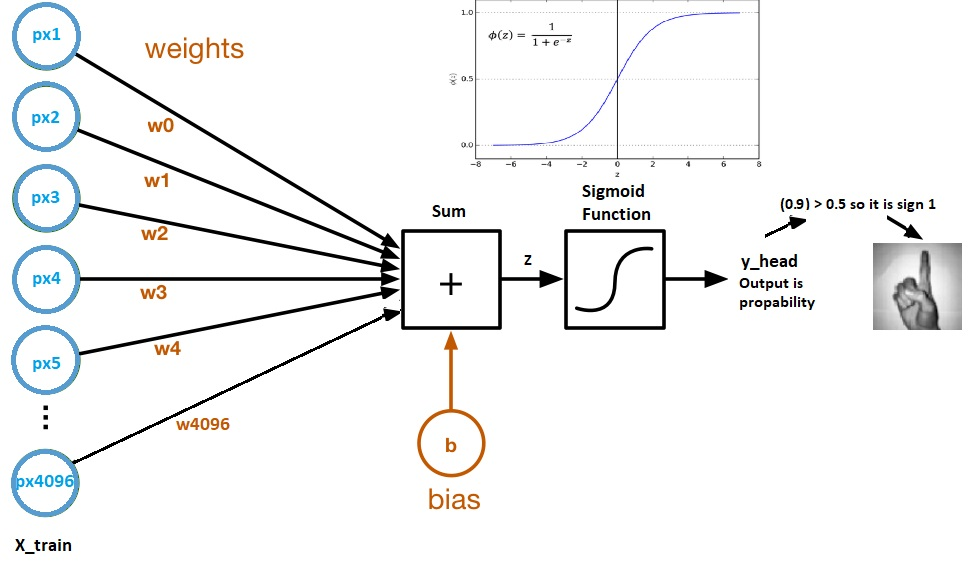

<a id = '4'></a><br>
# Defining Neccesary Functions

<a id = '5'></a><br>
## Parameter Initialize and Sigmoid Function

In [364]:
# weight와 bias를 지정하고 시작한다

def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w,b



def sigmoid(z):
    y_head = 1 / (1+np.exp(-z))
    return y_head

<a id = '6'></a><br>
## Forward and Backward Propagation

Loss Function:

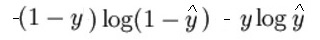

In [365]:
#%% Forward and Backward Propagation

def forward_backward_propagation(w,b,x_train,y_head):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head) - (1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss)) / x_train.shape[1]

    #backward propogation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients


<a id = '7'></a><br>
## Updating (Learning) Parameters

In [366]:
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []

    for i in range(number_of_iterarion):
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)

        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))

    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [367]:
# def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
#     cost_list = []
#     cost_list2 = []
#     index = []

#     for i in range(number_of_iterarion):
#         cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
#         cost_list.append(cost)

#         w = w - learning_rate * gradients["derivative_weight"]
#         b = b - learning_rate * gradients["derivative_bias"]

#     parameters = {"weight": w,"bias": b}

#     return parameters, gradients, cost_list

<a id = '8'></a><br>
## Prediction

In [368]:
def predict(w,b,x_test):
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    for i in range(z.shape[1]):
        if z[0,i]<= 0.45:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

<a id = '9'></a><br>
## Defining Logistic Regression Function

In [369]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    dimension =  x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)

    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)

    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)

    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

Cost after iteration 0: 0.695408
Cost after iteration 10: 0.695094
Cost after iteration 20: 0.694784
Cost after iteration 30: 0.694476
Cost after iteration 40: 0.694172
Cost after iteration 50: 0.693871
Cost after iteration 60: 0.693572
Cost after iteration 70: 0.693277
Cost after iteration 80: 0.692984
Cost after iteration 90: 0.692695
Cost after iteration 100: 0.692408
Cost after iteration 110: 0.692125
Cost after iteration 120: 0.691844
Cost after iteration 130: 0.691565
Cost after iteration 140: 0.691290
Cost after iteration 150: 0.691017
Cost after iteration 160: 0.690747
Cost after iteration 170: 0.690480
Cost after iteration 180: 0.690215
Cost after iteration 190: 0.689953
Cost after iteration 200: 0.689694
Cost after iteration 210: 0.689437
Cost after iteration 220: 0.689183
Cost after iteration 230: 0.688931
Cost after iteration 240: 0.688682
Cost after iteration 250: 0.688435
Cost after iteration 260: 0.688190
Cost after iteration 270: 0.687948
Cost after iteration 280: 0.687

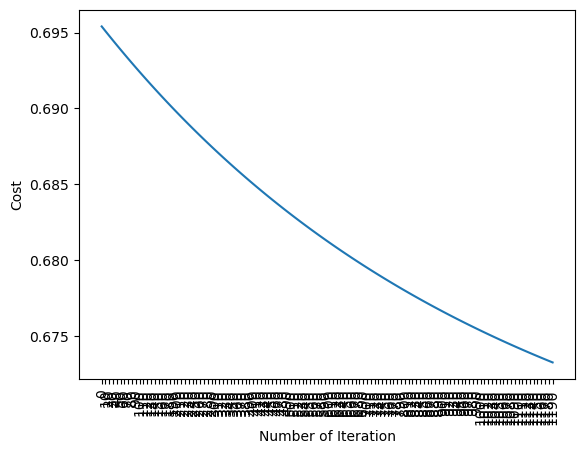

test accuracy: 31.707317073170728 %


In [370]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.001, num_iterations = 1200)

Cost after iteration 0: 0.695408
Cost after iteration 10: 0.695094
Cost after iteration 20: 0.694784
Cost after iteration 30: 0.694476
Cost after iteration 40: 0.694172
Cost after iteration 50: 0.693871
Cost after iteration 60: 0.693572
Cost after iteration 70: 0.693277
Cost after iteration 80: 0.692984
Cost after iteration 90: 0.692695
Cost after iteration 100: 0.692408
Cost after iteration 110: 0.692125
Cost after iteration 120: 0.691844
Cost after iteration 130: 0.691565
Cost after iteration 140: 0.691290
Cost after iteration 150: 0.691017
Cost after iteration 160: 0.690747
Cost after iteration 170: 0.690480
Cost after iteration 180: 0.690215
Cost after iteration 190: 0.689953
Cost after iteration 200: 0.689694
Cost after iteration 210: 0.689437
Cost after iteration 220: 0.689183
Cost after iteration 230: 0.688931
Cost after iteration 240: 0.688682
Cost after iteration 250: 0.688435
Cost after iteration 260: 0.688190
Cost after iteration 270: 0.687948
Cost after iteration 280: 0.687

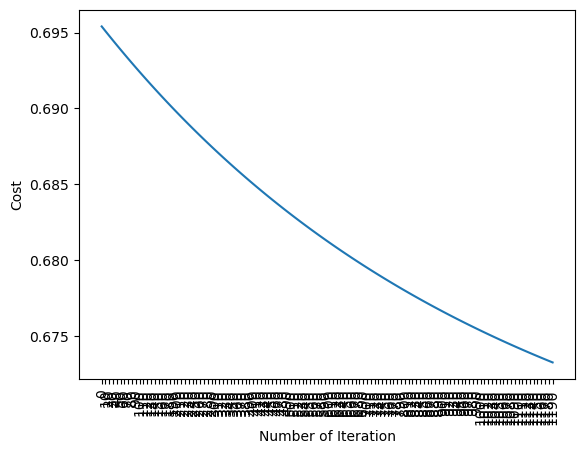

test accuracy: 31.707317073170728 %


In [371]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.001, num_iterations = 1200)

<a id = '10'></a><br>
# With Sklearn

In [372]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
print("Test Accuracy {}".format(lr.score(x_test.T,y_test.T)))


Test Accuracy 0.7913279132791328
